In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_predicted.csv")

df.head()

,real_avg_salary,real_min_salary,real_max_salary,pred_avg_salary
0,40000.0,28000.0,52000.0,40364.799084
1,99000.0,76000.0,122000.0,95258.954209
2,78000.0,55000.0,101000.0,66540.930445
3,80000.0,57000.0,103000.0,97225.810678
4,56000.0,43000.0,69000.0,68544.604624


In [3]:
real_avg_salary = df["real_avg_salary"]
real_min_salary = df["real_min_salary"]
real_max_salary = df["real_max_salary"]
pred_avg_salary = df["pred_avg_salary"]

In [4]:
# MAE, RMSE, R² para avg_salary
mae_avg = mean_absolute_error(real_avg_salary, pred_avg_salary)
rmse_avg = np.sqrt(mean_squared_error(real_avg_salary, pred_avg_salary))
r2_avg = r2_score(real_avg_salary, pred_avg_salary)

print(f"MAE (avg): {mae_avg:.2f}")
print(f"RMSE (avg): {rmse_avg:.2f}")
print(f"R² (avg): {r2_avg:.3f}")

# MAE, RMSE para min y max
mae_min = mean_absolute_error(real_min_salary, pred_avg_salary)
rmse_min = np.sqrt(mean_squared_error(real_min_salary, pred_avg_salary))

mae_max = mean_absolute_error(real_max_salary, pred_avg_salary)
rmse_max = np.sqrt(mean_squared_error(real_max_salary, pred_avg_salary))

print(f"\nMAE (min): {mae_min:.2f}, RMSE (min): {rmse_min:.2f}")
print(f"MAE (max): {mae_max:.2f}, RMSE (max): {rmse_max:.2f}")

# % dentro del intervalo [min, max]
within_interval = ((pred_avg_salary >= real_min_salary) & 
                   (pred_avg_salary <= real_max_salary)).mean() * 100
print(f"\n% prediccions dins l'interval min-max: {within_interval:.2f}%")


MAE (avg): 15132.25
RMSE (avg): 20164.64
R² (avg): 0.334

MAE (min): 21552.05, RMSE (min): 24853.64
MAE (max): 23631.98, RMSE (max): 31178.64

% prediccions dins l'interval min-max: 65.19%


MAE (Mean Absolute Error) i RMSE (Root Mean Squared Error)
   * El MAE mitjà és de $15.132,25, la qual cosa indica que, en mitjana, les prediccions del model s’allunyen del salari real uns 15.000 dòlars.
   * El RMSE mitjà és de $20.164,64, que penalitza més els errors grans. La diferència amb l’MAE mostra que hi ha alguns errors grans que incrementen la RMSE respecte l’MAE, cosa habitual quan existeixen salaris extrems.
   * Els valors de MAE i RMSE del mínim i màxim indiquen com d'allunyat està la predicció mitjana dels valors de l'interval minim i màxim. 
     * MAE mínim: 21.552,05 i RMSE mínim: 24.853,64
     * MAE màxim: 23.631,98 i RMSE màxim: 31.178,64

R² (Coeficient de determinació)

   * El R² mitjà és 0,334, cosa que significa que el model explica aproximadament el 33,4% de la variabilitat dels salaris.
   * Això suggereix que hi ha molts factors del salari que el model no captura. 

S'ha de tenir en compte que la variable inicial és un interval de sou entre dos valors. Per tant capturar el R² del valor exacte mitjà és potser massa rigurós. És per aquest motiu que es calcula el oercentatge de prediccions dins de l’interval mínim-màxim.
   * El 65,19% de prediccions dins l’interval real mínim-màxim indica que aproximadament dos terços de les prediccions del model estan dins del rang salarial ofert.
   * Tot i que no és un percentatge altíssim, és una mesura útil per entendre si el model és capaç de situar les prediccions dins del rang raonable, encara que no coincideixi exactament amb el salari mitjà.

Veiem que el model té un rendiment moderat. És capaç de fer prediccions aproximades amb errors rellevants (MAE 15k, RMSE 20k). Un 65% de prediccions dins del rang min-max mostra que el model té una orientació correcta.


In [5]:
# Error absoluto
df["abs_error"] = abs(real_avg_salary - pred_avg_salary)

print(df["abs_error"].describe())

# Outliers (por ejemplo, > Q3 + 1.5*IQR)
Q1 = df["abs_error"].quantile(0.25)
Q3 = df["abs_error"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df["abs_error"] > Q3 + 1.5*IQR]

print(f"Nombre d'outliers trobats: {len(outliers)}")


count      451.000000
mean     15132.247543
std      13342.506498
min         63.542866
25%       4524.259680
50%      11594.657925
75%      22238.094149
max      64724.701197
Name: abs_error, dtype: float64
Nombre d'outliers trobats: 10


Distribució general dels errors:
   * Hi ha 451 observacions de testing.
   * L’error absolut mitjà (MSE) és de $15.132,25, amb una desviació estàndard de $13.342,51, cosa que indica una variabilitat força elevada entre els errors de les prediccions.
   * L’error mínim és molt baix ($63,54), mentre que el màxim arriba fins a $64.724,70, cosa que mostra que hi ha alguns casos amb errors molt grans.

Quartils de l’error:

   * El 25% dels errors són menors a $4.524,26
   * La mediana és de $11.594,66
   * El 75% dels errors són menors a $22.238,09
     Això indica que la majoria de prediccions tenen errors moderats, però hi ha uns pocs casos amb errors molt elevats que augmenten la mitjana i la desviació estàndard.

Outliers:

   * S’han detectat 10 outliers, és a dir, prediccions amb errors significativament més alts que la resta. Aquests punts extrems poden ser responsables que l’RMSE sigui força més gran que l’MAE i podrien ser útils per analitzar què falla en el model en aquests casos.


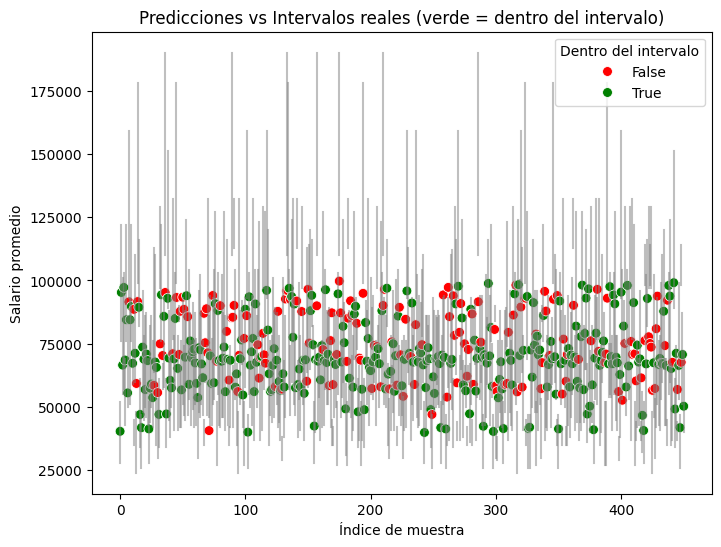

In [6]:
plt.figure(figsize=(8,6))

# Color según si la predicción está dentro del intervalo
df["in_interval"] = ((pred_avg_salary >= real_min_salary) & 
                     (pred_avg_salary <= real_max_salary))

# Dibujar cada intervalo como línea vertical
for i in range(len(df)):
    plt.plot([i, i], [real_min_salary[i], real_max_salary[i]], color='grey', alpha=0.5)

# Puntos: predicción
sns.scatterplot(x=range(len(df)), y=pred_avg_salary, hue=df["in_interval"],
                palette={True: "green", False: "red"}, s=50)

plt.xlabel("Índice de muestra")
plt.ylabel("Salario promedio")
plt.title("Predicciones vs Intervalos reales (verde = dentro del intervalo)")
plt.legend(title="Dentro del intervalo")
plt.show()


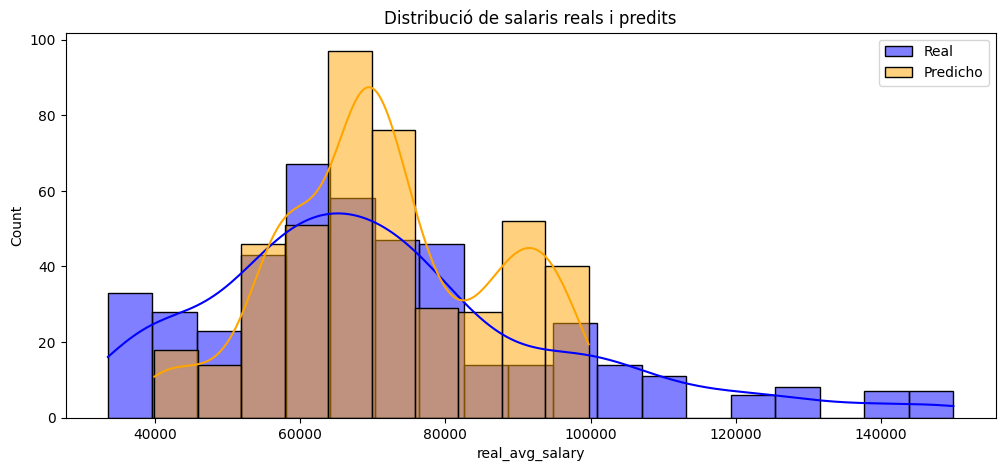

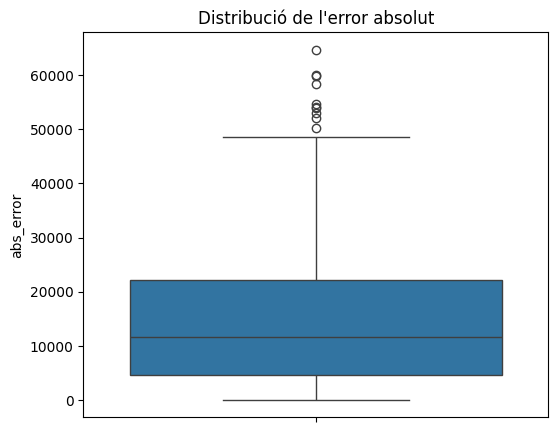

In [7]:
# Histogrames
plt.figure(figsize=(12,5))
sns.histplot(real_avg_salary, color="blue", label="Real", kde=True, alpha=0.5)
sns.histplot(pred_avg_salary, color="orange", label="Predicho", kde=True, alpha=0.5)
plt.title("Distribució de salaris reals i predits")
plt.legend()
plt.show()

# Boxplot errors
plt.figure(figsize=(6,5))
sns.boxplot(y=df["abs_error"])
plt.title("Distribució de l'error absolut")
plt.show()
